In [13]:
import pandas as pd
import numpy as np

file_name = "../datasets/Clothing_Store.csv"
data = pd.read_csv(file_name)
data.columns

Index(['CUSTOMER_ID', 'ZIP_CODE', 'TOTAL_VISITS', 'TOTAL_SPENT',
       'AVRG_SPENT_PER_VISIT', 'HAS_CREDIT_CARD', 'PSWEATERS', 'PKNIT_TOPS',
       'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS',
       'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION',
       'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND',
       'SPEND_LAST_MONTH', 'SPEND_LAST_3MONTH', 'SPEND_LAST_6MONTH',
       'SPENT_LAST_YEAR', 'GMP', 'PROMOS_ON_FILE', 'DAYS_ON_FILE', 'FREQ_DAYS',
       'MARKDOWN', 'PRODUCT_CLASSES', 'COUPONS', 'STYLES', 'STORES',
       'STORELOY', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP'],
      dtype='object')

<AxesSubplot:>

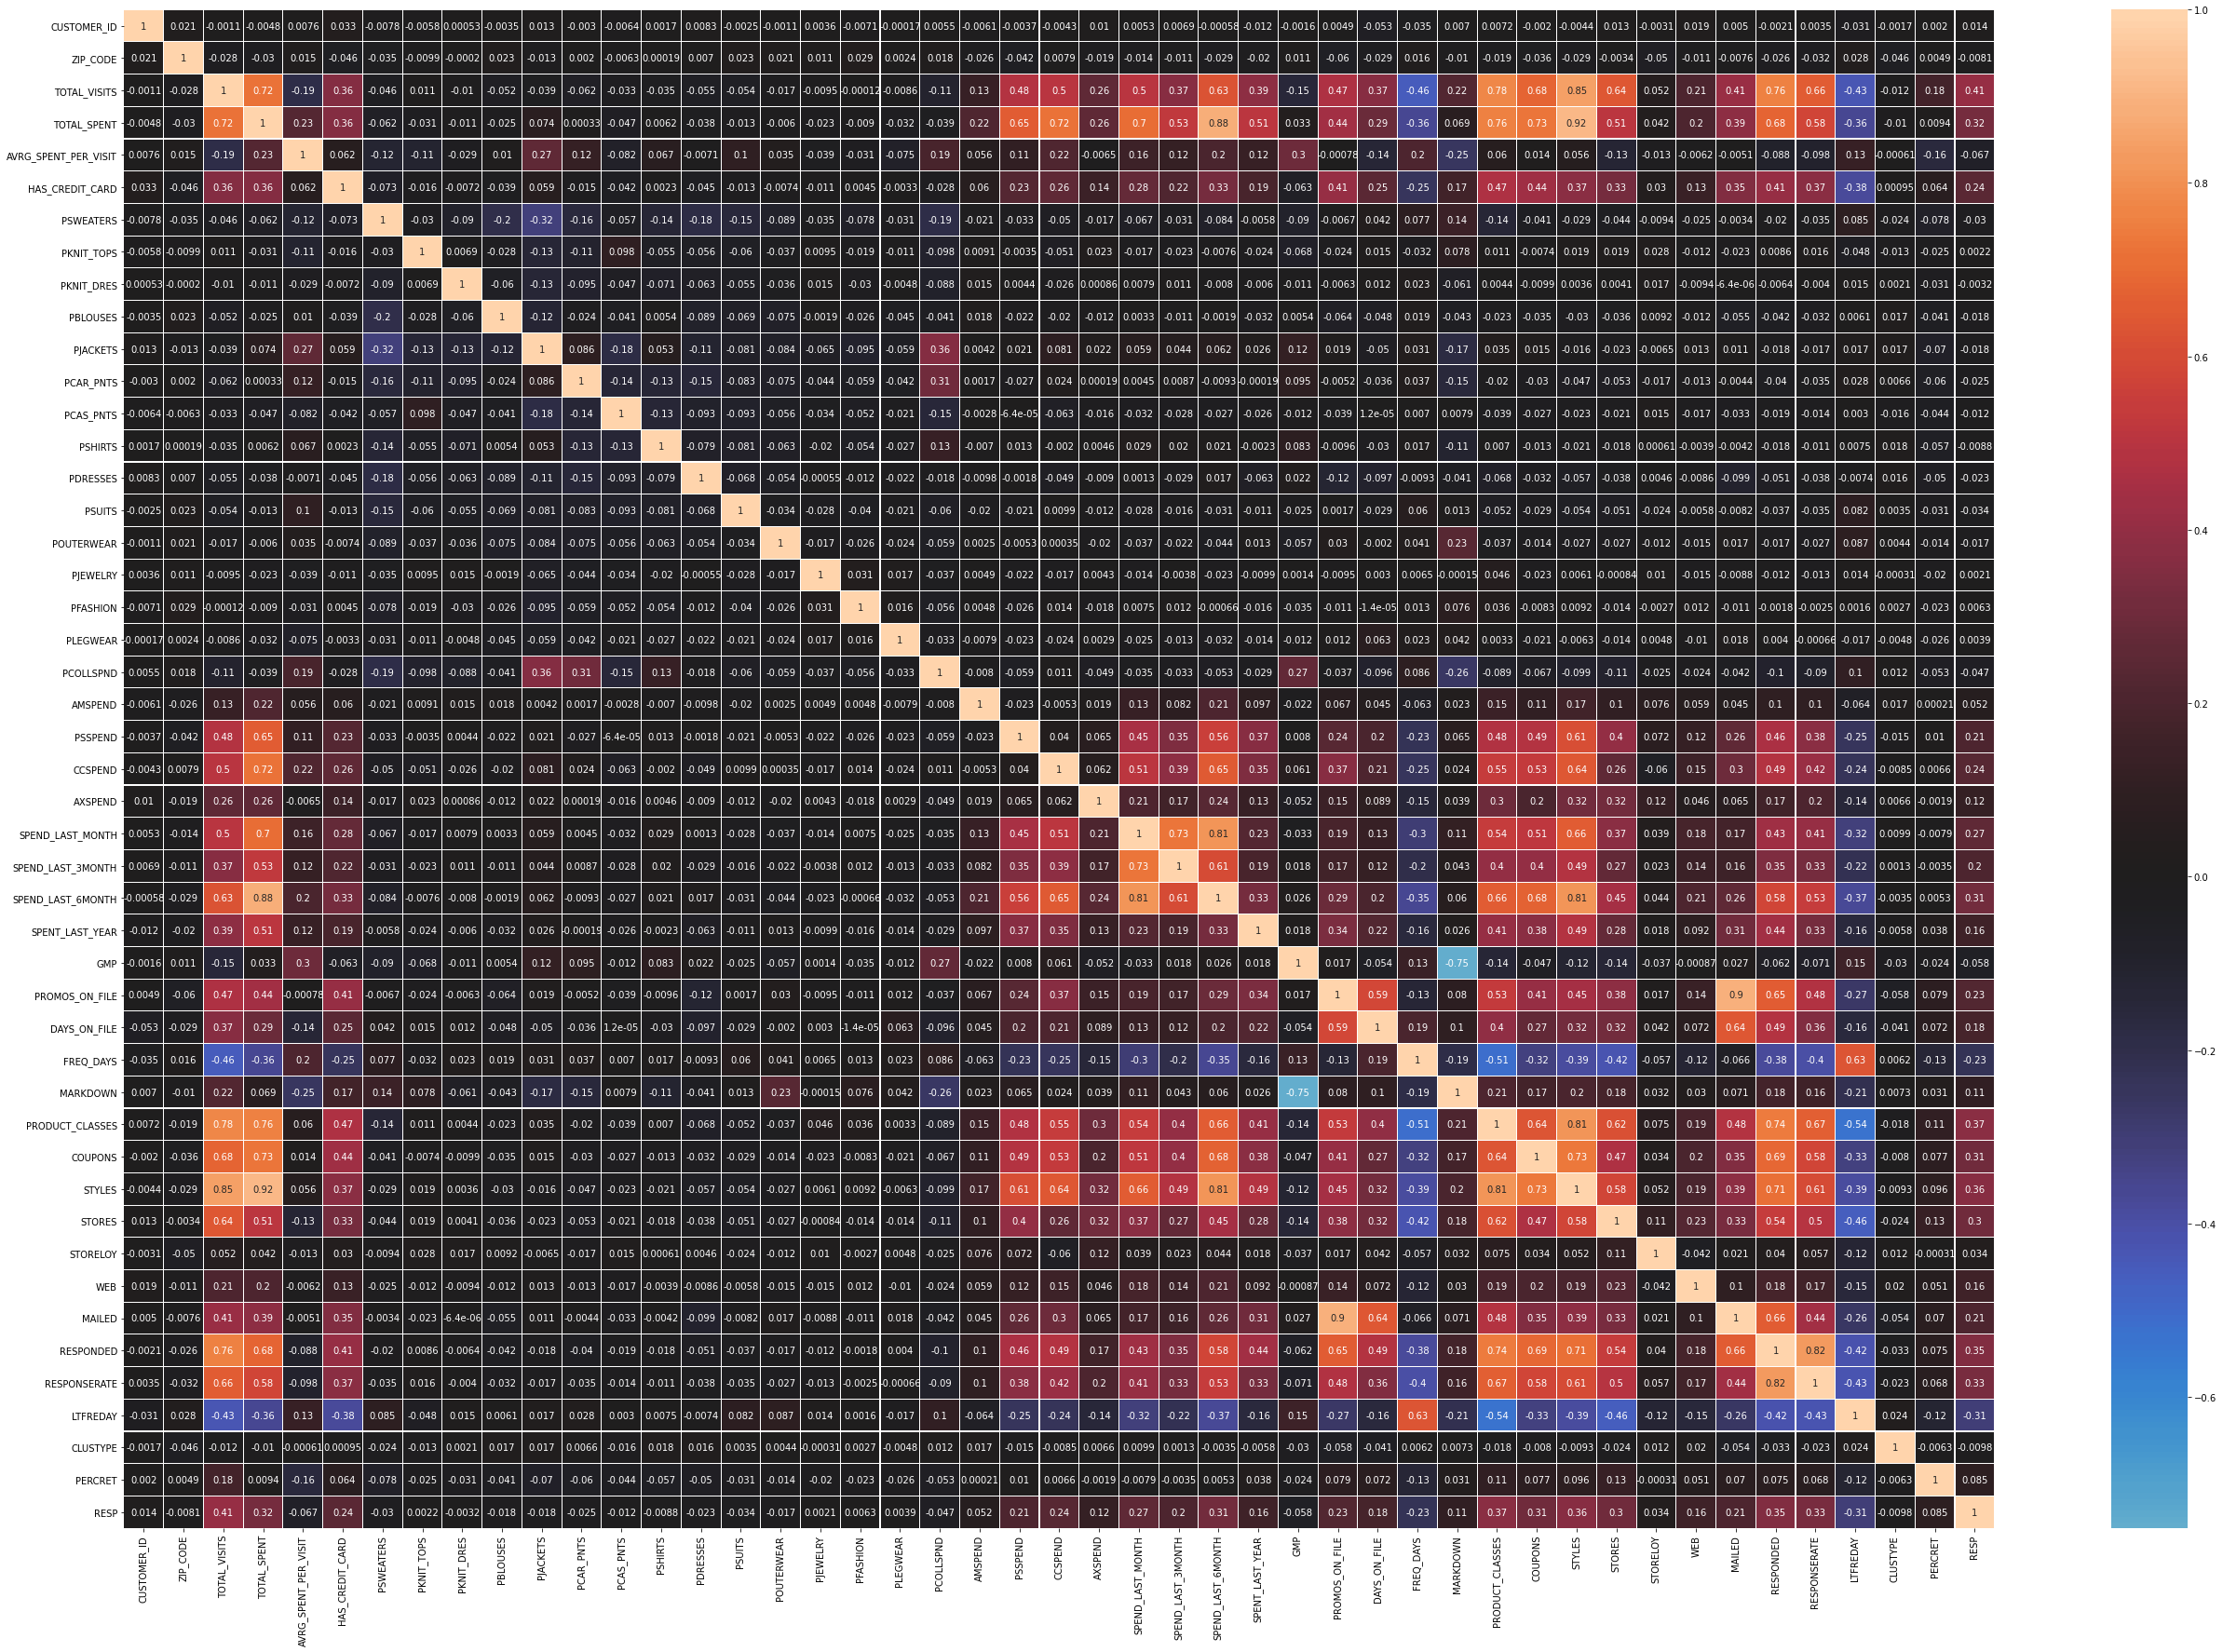

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(45,30)) 
corr = data.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

In [15]:
# Drop the CUSTOMER_ID attribute
data = data.drop(columns=['CUSTOMER_ID'])
data

,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,...,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,184.23,0,0.18,0.00,0.00,0.30,0.00,...,7,N,0,5,0,0.00,111.00,10,0.00,0
1,1028,4,258.00,64.50,1,0.26,0.16,0.00,0.00,0.00,...,7,Y,0,4,2,50.00,43.50,10,0.03,1
2,1056,2,77.00,38.50,0,1.00,0.00,0.00,0.00,0.00,...,7,N,0,4,0,0.00,68.60,16,0.00,0
3,1118,8,846.06,105.75,1,0.38,0.00,0.05,0.06,0.20,...,7,Y,0,9,6,66.67,26.96,10,0.00,0
4,1107,1,87.44,87.44,0,0.20,0.20,0.00,0.00,0.00,...,7,Y,0,0,0,0.00,24.50,20,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,63105,2,39.00,19.50,0,0.00,0.00,0.39,0.00,0.00,...,870,Y,0,1,0,0.00,107.66,1,1.51,0
21736,72207,6,280.59,46.76,0,0.02,0.00,0.00,0.06,0.22,...,4507,N,0,5,2,40.00,18.45,12,0.69,0
21737,77084,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,0.23,...,1615,N,0,7,2,28.57,12.62,15,0.08,1
21738,78640,3,265.94,88.64,0,0.18,0.00,0.03,0.11,0.00,...,36,Y,0,7,0,0.00,32.12,38,0.37,0


In [16]:
# Preprocess the CLUSTYPE attribute
# Set the cutoff point to be 3%. Any cluster containing less than 3% of our customers gets placed into a cluster 
# denoted -1. 

data.loc[(data.CLUSTYPE != 10) & (data.CLUSTYPE != 1) & (data.CLUSTYPE != 4) & 
         (data.CLUSTYPE != 16) & (data.CLUSTYPE != 8) & (data.CLUSTYPE != 15) & (data.CLUSTYPE != 11) & 
         (data.CLUSTYPE != 18) & (data.CLUSTYPE != 5) & (data.CLUSTYPE != 23) & (data.CLUSTYPE != 38) & 
         (data.CLUSTYPE != 3) & (data.CLUSTYPE != 12), "CLUSTYPE"] = -1

data[:10]

,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,...,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,184.23,0,0.18,0.00,0.00,0.30,0.00,...,7,N,0,5,0,0.00,111.00,10,0.00,0
1,1028,4,258.00,64.50,1,0.26,0.16,0.00,0.00,0.00,...,7,Y,0,4,2,50.00,43.50,10,0.03,1
2,1056,2,77.00,38.50,0,1.00,0.00,0.00,0.00,0.00,...,7,N,0,4,0,0.00,68.60,16,0.00,0
3,1118,8,846.06,105.75,1,0.38,0.00,0.05,0.06,0.20,...,7,Y,0,9,6,66.67,26.96,10,0.00,0
4,1107,1,87.44,87.44,0,0.20,0.20,0.00,0.00,0.00,...,7,Y,0,0,0,0.00,24.50,-1,0.00,0
5,1106,2,120.00,60.00,0,0.00,0.56,0.00,0.00,0.00,...,7,Y,0,0,0,0.00,72.50,3,0.00,0
6,1118,1,782.08,782.08,1,0.12,0.00,0.00,0.00,0.57,...,7,Y,0,4,0,0.00,36.25,10,0.00,0
7,1106,1,79.00,79.00,0,0.00,0.00,0.00,0.00,0.00,...,7,Y,0,4,1,25.00,149.00,10,0.00,0
8,1104,1,318.50,318.50,0,0.24,0.00,0.00,0.00,0.31,...,7,N,0,3,0,0.00,264.00,23,0.00,0
9,1104,12,1663.46,138.62,1,0.25,0.04,0.01,0.06,0.11,...,7,Y,0,11,7,63.64,17.53,23,0.00,1


### ZIP_CODE attribute

Zip codes are constructed heirarchically. The first digit indicates a collection of states in the same geographical region. The second and third digit indicates an area within this collection of states, such as a large city or a group of towns. The fourth and fifth digit indicates more precise locations, such as a collection of mailing addresses or a street. Therefore, we can split the ZIP_CODE attribute into bins, with each bin containing a group of zip code values. The way we will split the bins is by the first digit of the zip code, ie: zip codes starting with 1- will be one attribute value, zip codes starting with 2- will be another attribute value, etc. This retains the original information that zip codes provide (albeit at a higher abstraction level) -- geographical location -- while also dealing with the huge cardinality of the ZIP_CODE attribute.

In [17]:
# Preprocess the ZIP_CODE attribute
for i in range(0, 10):
    data.loc[data.ZIP_CODE // 10000 == i, "ZIP_CODE"] = i
    
data

,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,...,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,0,2,368.46,184.23,0,0.18,0.00,0.00,0.30,0.00,...,7,N,0,5,0,0.00,111.00,10,0.00,0
1,0,4,258.00,64.50,1,0.26,0.16,0.00,0.00,0.00,...,7,Y,0,4,2,50.00,43.50,10,0.03,1
2,0,2,77.00,38.50,0,1.00,0.00,0.00,0.00,0.00,...,7,N,0,4,0,0.00,68.60,16,0.00,0
3,0,8,846.06,105.75,1,0.38,0.00,0.05,0.06,0.20,...,7,Y,0,9,6,66.67,26.96,10,0.00,0
4,0,1,87.44,87.44,0,0.20,0.20,0.00,0.00,0.00,...,7,Y,0,0,0,0.00,24.50,-1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,6,2,39.00,19.50,0,0.00,0.00,0.39,0.00,0.00,...,870,Y,0,1,0,0.00,107.66,1,1.51,0
21736,7,6,280.59,46.76,0,0.02,0.00,0.00,0.06,0.22,...,4507,N,0,5,2,40.00,18.45,12,0.69,0
21737,7,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,0.23,...,1615,N,0,7,2,28.57,12.62,15,0.08,1
21738,7,3,265.94,88.64,0,0.18,0.00,0.03,0.11,0.00,...,36,Y,0,7,0,0.00,32.12,38,0.37,0


In [19]:
# Now we want to convert all the categorical attributes into binary attributes.
# There are two attributes we need to convert: ZIP_CODE and CLUSTYPE

zip_code_values = [s for s in range(0, 10)] # ZIP_CODE attribute values
cluster_type_values = [10, 1, 4, 16, 8, 15, 11, 18, 5, 23, 38, 3, 12, -1] # CLUSTYPE attribute values

# Converting ZIP_CODE attribute
for x in zip_code_values:
    col_name = "ZIP_CODE_" + str(x)
    data[col_name] = 0

for x in range(len(data)):
    zip_code_value = data.loc[x, "ZIP_CODE"]
    col = "ZIP_CODE_" + str(zip_code_value)
    data.at[x, col] = 1

# Converting CLUSTYPE attribute
for x in cluster_type_values:
    col_name = "CLUSTYPE_" + str(x)
    data[col_name] = 0

for x in range(len(data)):
    cluster_type_value = data.loc[x, "CLUSTYPE"]
    col = "CLUSTYPE_" + str(cluster_type_value)
    data.at[x, col] = 1
    
data

,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,...,CLUSTYPE_8,CLUSTYPE_15,CLUSTYPE_11,CLUSTYPE_18,CLUSTYPE_5,CLUSTYPE_23,CLUSTYPE_38,CLUSTYPE_3,CLUSTYPE_12,CLUSTYPE_-1
0,0,2,368.46,184.23,0,0.18,0.00,0.00,0.30,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0,4,258.00,64.50,1,0.26,0.16,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,0,2,77.00,38.50,0,1.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,0,8,846.06,105.75,1,0.38,0.00,0.05,0.06,0.20,...,0,0,0,0,0,0,0,0,0,0
4,0,1,87.44,87.44,0,0.20,0.20,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,6,2,39.00,19.50,0,0.00,0.00,0.39,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
21736,7,6,280.59,46.76,0,0.02,0.00,0.00,0.06,0.22,...,0,0,0,0,0,0,0,0,1,0
21737,7,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,0.23,...,0,1,0,0,0,0,0,0,0,0
21738,7,3,265.94,88.64,0,0.18,0.00,0.03,0.11,0.00,...,0,0,0,0,0,0,1,0,0,0


In [20]:
# Drop the CLUSTYPE and ZIP_CODE columns
data = data.drop(columns=['CLUSTYPE'])
data = data.drop(columns=['ZIP_CODE'])

data

,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,...,CLUSTYPE_8,CLUSTYPE_15,CLUSTYPE_11,CLUSTYPE_18,CLUSTYPE_5,CLUSTYPE_23,CLUSTYPE_38,CLUSTYPE_3,CLUSTYPE_12,CLUSTYPE_-1
0,2,368.46,184.23,0,0.18,0.00,0.00,0.30,0.00,0.25,...,0,0,0,0,0,0,0,0,0,0
1,4,258.00,64.50,1,0.26,0.16,0.00,0.00,0.00,0.18,...,0,0,0,0,0,0,0,0,0,0
2,2,77.00,38.50,0,1.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,8,846.06,105.75,1,0.38,0.00,0.05,0.06,0.20,0.17,...,0,0,0,0,0,0,0,0,0,0
4,1,87.44,87.44,0,0.20,0.20,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,2,39.00,19.50,0,0.00,0.00,0.39,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
21736,6,280.59,46.76,0,0.02,0.00,0.00,0.06,0.22,0.03,...,0,0,0,0,0,0,0,0,1,0
21737,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,0.23,0.12,...,0,1,0,0,0,0,0,0,0,0
21738,3,265.94,88.64,0,0.18,0.00,0.03,0.11,0.00,0.00,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Preprocess VALPHON attribute by changing N to 0 and Y to 1 (just for uniformity)
data.loc[data.VALPHON == 'N', "VALPHON"] = 0
data.loc[data.VALPHON == 'Y', "VALPHON"] = 1

data

,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,...,CLUSTYPE_8,CLUSTYPE_15,CLUSTYPE_11,CLUSTYPE_18,CLUSTYPE_5,CLUSTYPE_23,CLUSTYPE_38,CLUSTYPE_3,CLUSTYPE_12,CLUSTYPE_-1
0,2,368.46,184.23,0,0.18,0.00,0.00,0.30,0.00,0.25,...,0,0,0,0,0,0,0,0,0,0
1,4,258.00,64.50,1,0.26,0.16,0.00,0.00,0.00,0.18,...,0,0,0,0,0,0,0,0,0,0
2,2,77.00,38.50,0,1.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,8,846.06,105.75,1,0.38,0.00,0.05,0.06,0.20,0.17,...,0,0,0,0,0,0,0,0,0,0
4,1,87.44,87.44,0,0.20,0.20,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,2,39.00,19.50,0,0.00,0.00,0.39,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
21736,6,280.59,46.76,0,0.02,0.00,0.00,0.06,0.22,0.03,...,0,0,0,0,0,0,0,0,1,0
21737,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,0.23,0.12,...,0,1,0,0,0,0,0,0,0,0
21738,3,265.94,88.64,0,0.18,0.00,0.03,0.11,0.00,0.00,...,0,0,0,0,0,0,1,0,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
data_rows = data.to_numpy().tolist()
columns_list = data.columns.to_numpy().tolist()

scaler = MinMaxScaler()

normalized_data_rows = scaler.fit_transform(data_rows)

data = pd.DataFrame(normalized_data_rows, columns = columns_list)

data

,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,...,CLUSTYPE_8,CLUSTYPE_15,CLUSTYPE_11,CLUSTYPE_18,CLUSTYPE_5,CLUSTYPE_23,CLUSTYPE_38,CLUSTYPE_3,CLUSTYPE_12,CLUSTYPE_-1
0,0.008772,0.016324,0.095728,0.0,0.18,0.00,0.00,0.30,0.00,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026316,0.011417,0.033349,1.0,0.26,0.16,0.00,0.00,0.00,0.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008772,0.003377,0.019803,0.0,1.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061404,0.037541,0.054840,1.0,0.38,0.00,0.05,0.06,0.20,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.003840,0.045301,0.0,0.20,0.20,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,0.008772,0.001689,0.009904,0.0,0.00,0.00,0.39,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21736,0.043860,0.012421,0.024107,0.0,0.02,0.00,0.00,0.06,0.22,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21737,0.070175,0.056594,0.073549,0.0,0.29,0.04,0.01,0.14,0.23,0.12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21738,0.017544,0.011770,0.045926,0.0,0.18,0.00,0.03,0.11,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
# save as .csv file
data.to_csv(index = False, path_or_buf = '../datasets/final_clothing_store.csv')